In [2]:
import pandas as pd

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/Plant_1_Generation_Data.csv")
print(df.head())
print("\nShape: ", df.shape)

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Shape:  (68778, 7)


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    41

In [4]:
print(df.isnull().sum())

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [5]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)
print(df.dtypes)

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 189E-2F9F

 Directory of C:\Users\Admin\Downloads\soms_env

02-10-2025  02:58    <DIR>          .
01-10-2025  13:11    <DIR>          ..
01-10-2025  13:11    <DIR>          .ipynb_checkpoints
01-10-2025  12:24    <DIR>          .kaggle
01-10-2025  12:35    <DIR>          data
01-10-2025  12:37    <DIR>          etc
30-09-2025  19:18    <DIR>          Include
30-09-2025  19:18    <DIR>          Lib
30-09-2025  19:18               224 pyvenv.cfg
01-10-2025  16:34    <DIR>          Scripts
01-10-2025  12:38    <DIR>          share
02-10-2025  02:58            27,744 test_load.ipynb
               2 File(s)         27,968 bytes
              10 Dir(s)  164,308,742,144 bytes free


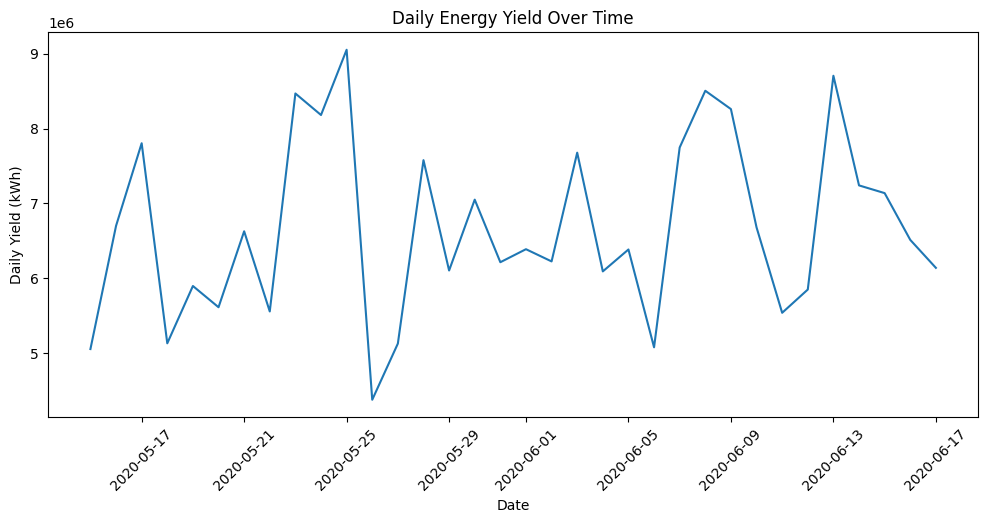

In [6]:
import matplotlib.pyplot as plt

# Aggregate by day
daily_yield = df.groupby(df['DATE_TIME'].dt.date)['DAILY_YIELD'].sum()

plt.figure(figsize=(12,5))
daily_yield.plot()
plt.title('Daily Energy Yield Over Time')
plt.xlabel("Date")
plt.ylabel("Daily Yield (kWh)")
plt.xticks(rotation=45)
plt.show()

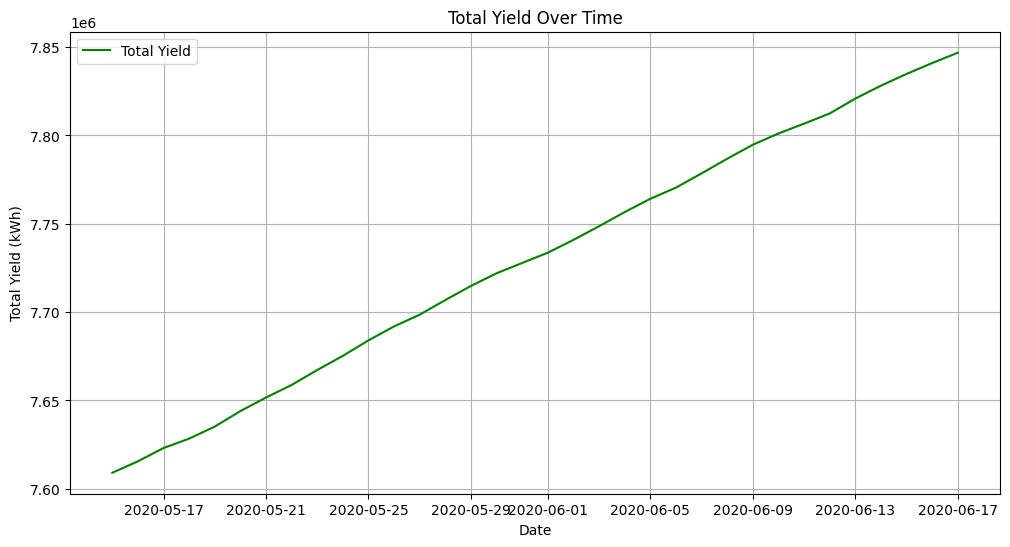

In [7]:
total_yield = df.groupby(df['DATE_TIME'].dt.date)['TOTAL_YIELD'].max()

plt.figure(figsize=(12,6))
plt.plot(total_yield.index, total_yield.values, color="green", label="Total Yield")
plt.xlabel("Date")
plt.ylabel("Total Yield (kWh)")
plt.title("Total Yield Over Time")
plt.legend()
plt.grid(True)
plt.show()

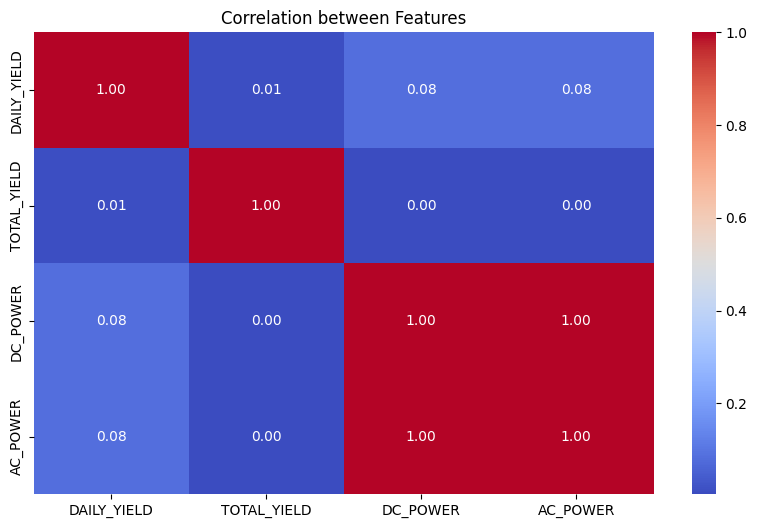

In [8]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[['DAILY_YIELD','TOTAL_YIELD','DC_POWER','AC_POWER']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Features")
plt.show()

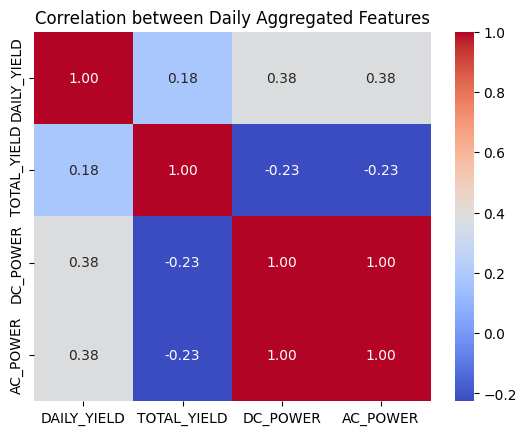

In [11]:
daily_data = df.groupby(df['DATE_TIME'].dt.date).agg({
    'DAILY_YIELD':'sum',
    'TOTAL_YIELD':'max',
    'DC_POWER':'mean',
    'AC_POWER':'mean'
})
sns.heatmap(daily_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Daily Aggregated Features")
plt.show()

In [10]:
df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.day
df['month'] = df['DATE_TIME'].dt.month
df['year'] = df['DATE_TIME'].dt.year
df['dayofweek'] = df['DATE_TIME'].dt.dayofweek

In [11]:
print(df.isnull().sum())

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
hour           0
day            0
month          0
year           0
dayofweek      0
dtype: int64


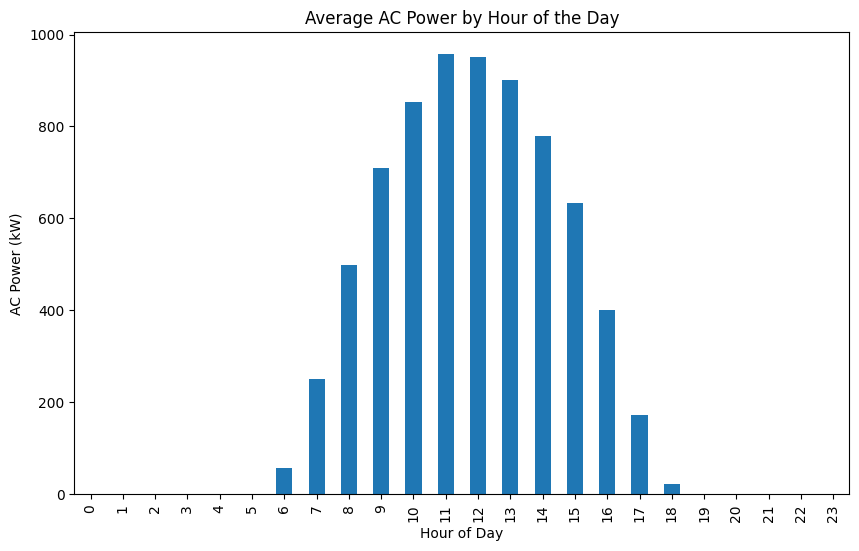

In [12]:
import matplotlib.pyplot as plt
# Average AC Power by hour
hourly_power = df.groupby('hour')['AC_POWER'].mean()
plt.figure(figsize=(10,6))
hourly_power.plot(kind='bar')
plt.title("Average AC Power by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("AC Power (kW)")
plt.show()

In [13]:
# Now we are Extracting time-based features
df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.day
df['month'] = df['DATE_TIME'].dt.month
df['year'] = df['DATE_TIME'].dt.year
df['dayofweek'] = df['DATE_TIME'].dt.dayofweek # This value goes from 0 to 6 as monday to sunday

df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hour,day,month,year,dayofweek
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,15,5,2020,4
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,15,5,2020,4
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,15,5,2020,4
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,15,5,2020,4
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,15,5,2020,4


In [14]:
print("Missing values in each column:\n")
print(df.isnull().sum())
print("\nSummary Staticstics:")
print(df.describe())

Missing values in each column:

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
hour           0
day            0
month          0
year           0
dayofweek      0
dtype: int64

Summary Staticstics:
                           DATE_TIME   PLANT_ID      DC_POWER      AC_POWER  \
count                          68778    68778.0  68778.000000  68778.000000   
mean   2020-06-01 08:02:49.458256896  4135001.0   3147.426211    307.802752   
min              2020-05-15 00:00:00  4135001.0      0.000000      0.000000   
25%              2020-05-24 00:45:00  4135001.0      0.000000      0.000000   
50%              2020-06-01 14:30:00  4135001.0    429.000000     41.493750   
75%              2020-06-09 20:00:00  4135001.0   6366.964286    623.618750   
max              2020-06-17 23:45:00  4135001.0  14471.125000   1410.950000   
std                              NaN        0.0   4036.457169    394.396439   

        DAILY_YIE

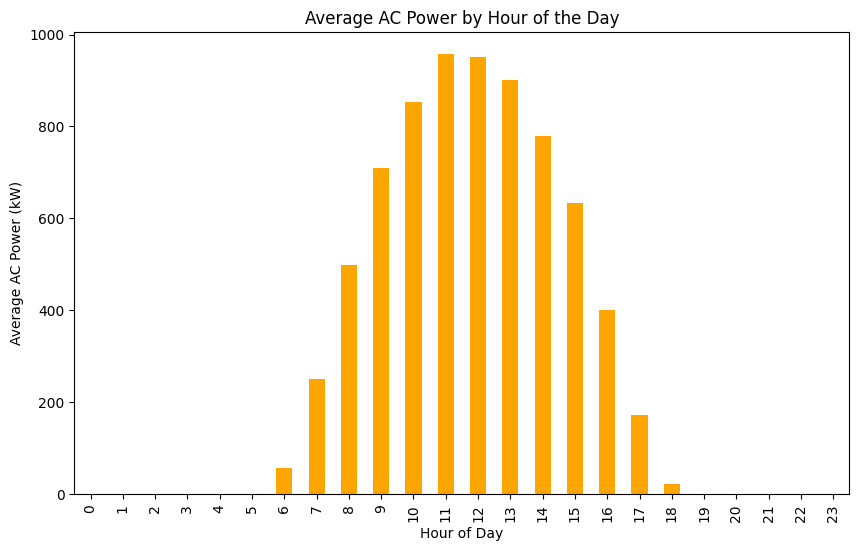

In [15]:
import matplotlib.pyplot as plt

# Group by hour
hourly_power = df.groupby('hour')['AC_POWER'].mean()

plt.figure(figsize=(10,6))
hourly_power.plot(kind='bar', color="orange")
plt.title("Average AC Power by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average AC Power (kW)")
plt.show()

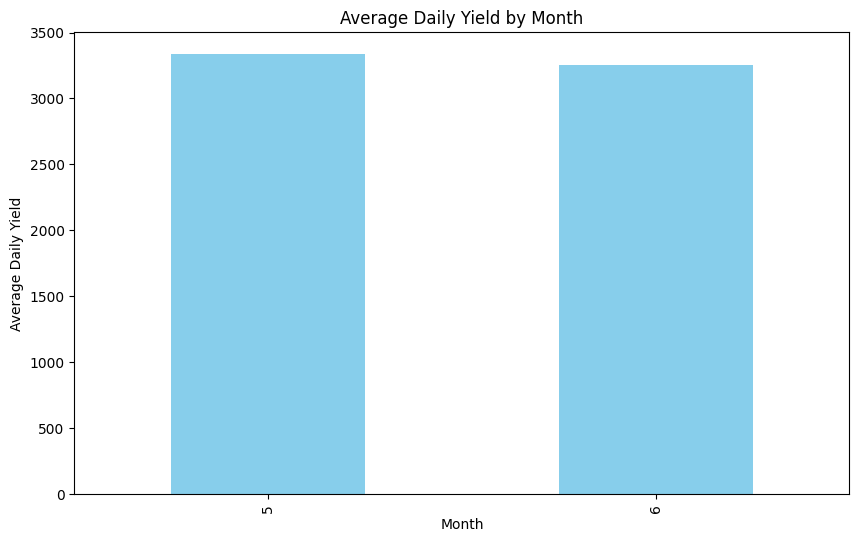

In [16]:
monthly_yield = df.groupby('month')['DAILY_YIELD'].mean()

plt.figure(figsize=(10,6))
monthly_yield.plot(kind='bar', color="skyblue")
plt.title("Average Daily Yield by Month")
plt.xlabel("Month")
plt.ylabel("Average Daily Yield")
plt.show()

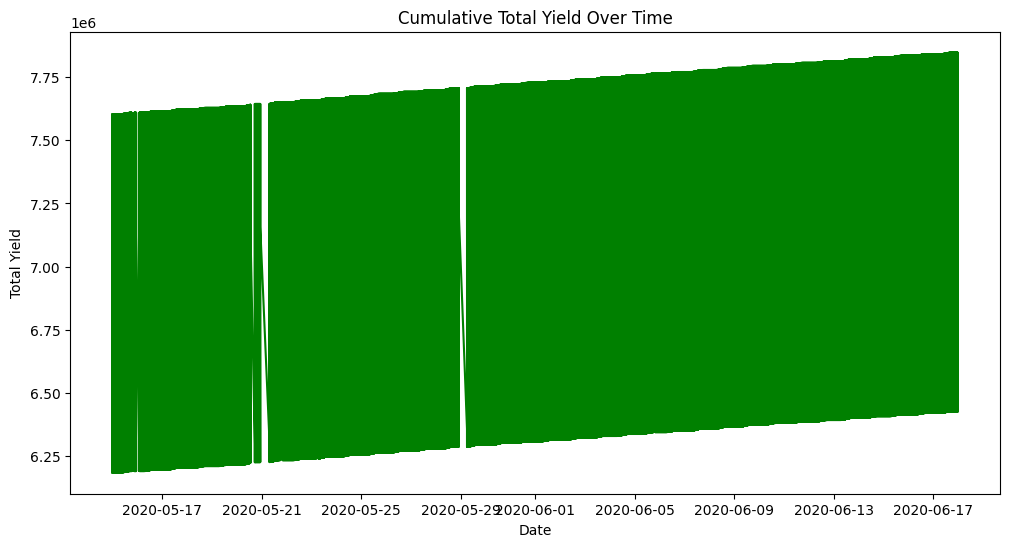

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['DATE_TIME'], df['TOTAL_YIELD'], color="green")
plt.title("Cumulative Total Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Total Yield")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_30448\3604066079.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['AC_lag_1','AC_lag_3']] = df[['AC_lag_1','AC_lag_3']].fillna(method='ffill').fillna(0)


Train shape: (55022, 7) Test shape: (13756, 7)
LinearRegression(baseline) -> MAE: 0.640 | RMSE: 1.059 | R2: 1.0000


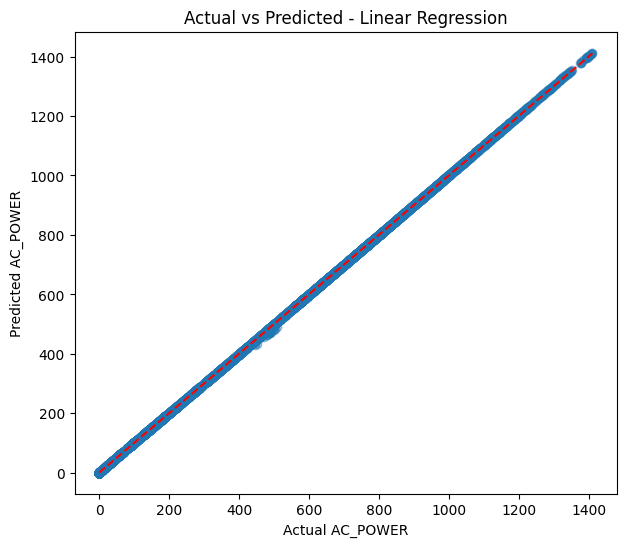

XGBoost -> MAE: 0.787 | RMSE: 2.711 | R2: 0.9999


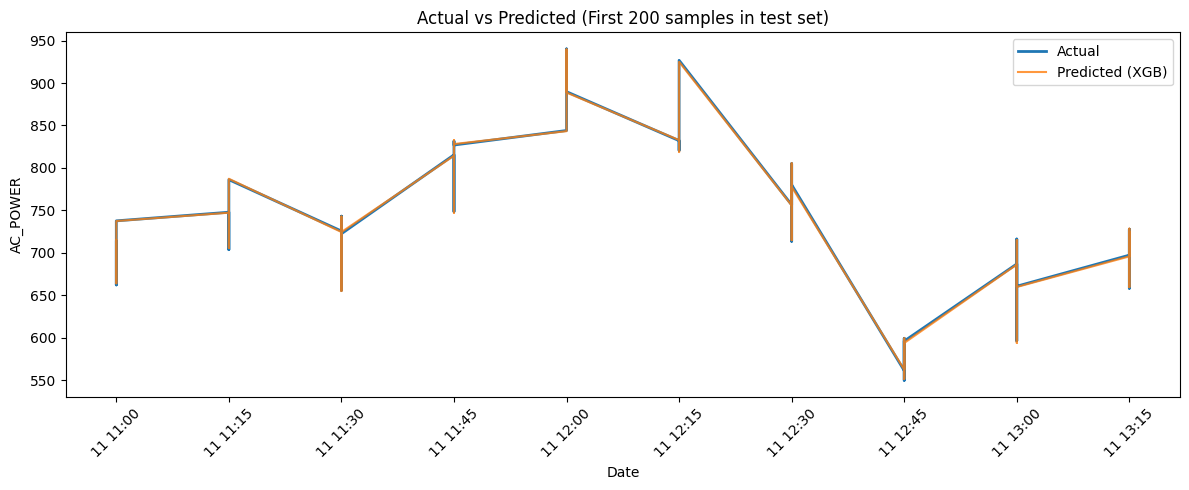

Models saved to models


In [18]:
# Preparing the data for baseline recurrsion model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import joblib

# Loading the data:
df = pd.read_csv("data/Plant_1_Generation_Data.csv")
# Parsing the data:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True, errors='coerce')
# Sorting by time and reset index -> Important for time-based split)
df = df.sort_values('DATE_TIME').reset_index(drop=True)

# Converting DATE_TIME to proper datetime:
# Time features:
df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.day
df['month'] = df['DATE_TIME'].dt.month
df['dayofweek'] = df['DATE_TIME'].dt.dayofweek

# Per-inverter lag featues (helps capture temporal continuity
# We compute lags within each SOURCE_KEY to avoid mixing inverters.
df['AC_lag_1'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
df['AC_lag_3'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(3)

# Forward/Backward fill for small gaps per inverter
df[['AC_lag_1','AC_lag_3']] = df[['AC_lag_1','AC_lag_3']].fillna(method='ffill').fillna(0)

# Feature list: using DC_POWER + time features + lags
features = ['DC_POWER','hour','day','month','dayofweek','AC_lag_1','AC_lag_3']
target = 'AC_POWER'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Time based train/test split (80% earlier -> train 20% latest -> test)
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index].copy()
test = df.iloc[split_index:].copy()

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Simple baseline : Linear Regression
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

# Evaluating Linear Regression
def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{name} -> MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.4f}")
    return mae,rmse,r2
evaluate(y_test, y_pred_lr, "LinearRegression(baseline)")

#  PLotting actual vs predicted 
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lr, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # -> diagonally
plt.xlabel("Actual AC_POWER")
plt.ylabel("Predicted AC_POWER")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# Stronger baseline : Using XGBoost
xgb = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.08, random_state=42, tree_method='hist')
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

y_pred_xgb = xgb.predict(X_test)
evaluate(y_test, y_pred_xgb, "XGBoost")

# Time series plot for a short interval of actual vs predicted (XGBoost)
plt.figure(figsize=(12,5))
plt.plot(test['DATE_TIME'].iloc[:200], y_test.iloc[:200].values, label='Actual', linewidth=2)
plt.plot(test['DATE_TIME'].iloc[:200], y_pred_xgb[:200], label="Predicted (XGB)", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("AC_POWER")
plt.title("Actual vs Predicted (First 200 samples in test set)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save models for later
joblib.dump(lr_pipe, "models/linear_baseline.joblib")
joblib.dump(xgb, "models/xgb_baseline.joblib")

print("Models saved to models")

In [19]:
import pandas as pd
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df = df.sort_values(['PLANT_ID','SOURCE_KEY','DATE_TIME']).reset_index(drop=True)

df['EFFICIENCY'] = df['AC_POWER']/df['DC_POWER']
df['EFFICIENCY'] = df['EFFICIENCY'].replace([np.inf, -np.inf], 0).fillna(0)

df['hour'] = df['DATE_TIME'].dt.hour
df['day'] = df['DATE_TIME'].dt.day
df['month'] = df['DATE_TIME'].dt.month

df['AC_lag_1'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
df['AC_lag_3'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(3)

df['AC_rolling_mean_3'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1).rolling(window=3).mean()
df = df.fillna(0)
print(df.head(10))

            DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0 2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1 2020-05-15 00:15:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
2 2020-05-15 00:30:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
3 2020-05-15 00:45:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
4 2020-05-15 01:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
5 2020-05-15 01:15:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
6 2020-05-15 01:30:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
7 2020-05-15 01:45:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
8 2020-05-15 02:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
9 2020-05-15 02:15:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  hour  day  month  dayofweek  AC_lag_1  AC_lag_3  \
0          0.0    6259559.0     0   15      5          4       0.0       0.0   
1          0.0    6259559.0     0   15      5  

Columns available: ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'EFFICIENCY', 'hour', 'day', 'month', 'dow', 'AC_lag_1', 'AC_lag_3', 'AC_roll3']
Sample rows:
    DC_POWER  EFFICIENCY  hour  day  month  dow  AC_lag_1  AC_lag_3  AC_roll3  \
0       0.0         0.0     0   15      5    4       0.0       0.0       0.0   
1       0.0         0.0     0   15      5    4       0.0       0.0       0.0   
2       0.0         0.0     0   15      5    4       0.0       0.0       0.0   
3       0.0         0.0     0   15      5    4       0.0       0.0       0.0   
4       0.0         0.0     1   15      5    4       0.0       0.0       0.0   

   AC_POWER  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Train shape: (55022, 9), Test shape: (13756, 9)
LinearRegression (with engineered features) -> MAE: 0.562 | RMSE: 0.883 | R2: 1.0000


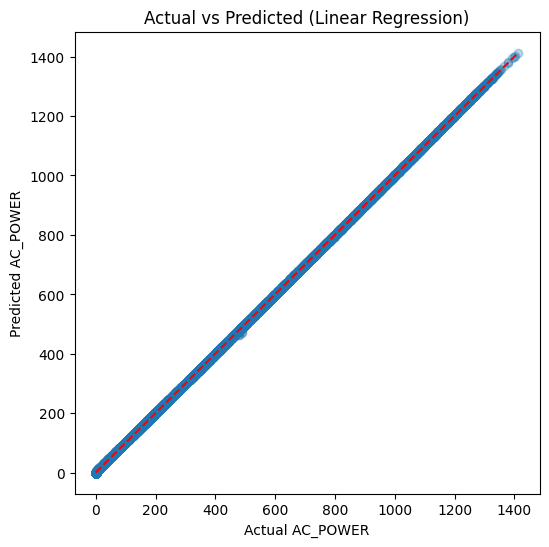

XGBoost (engineered features) -> MAE: 0.732 | RMSE: 1.503 | R2: 1.0000


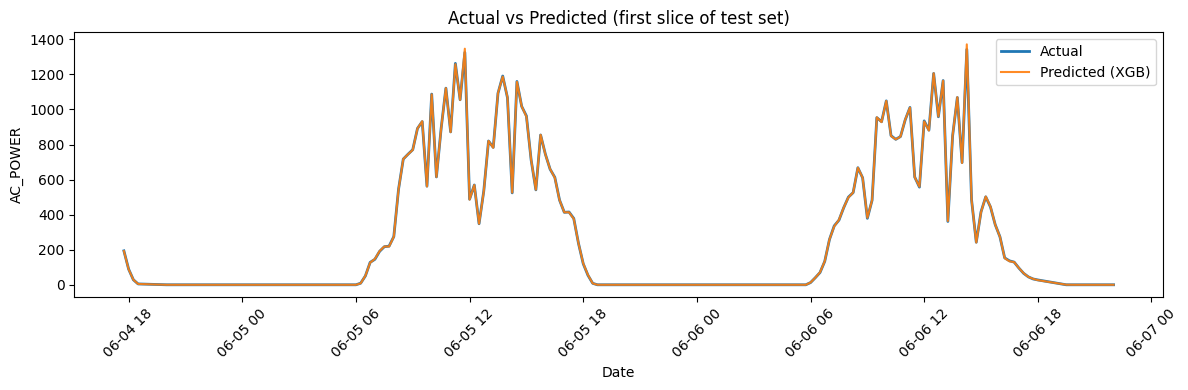

Saved models to models/


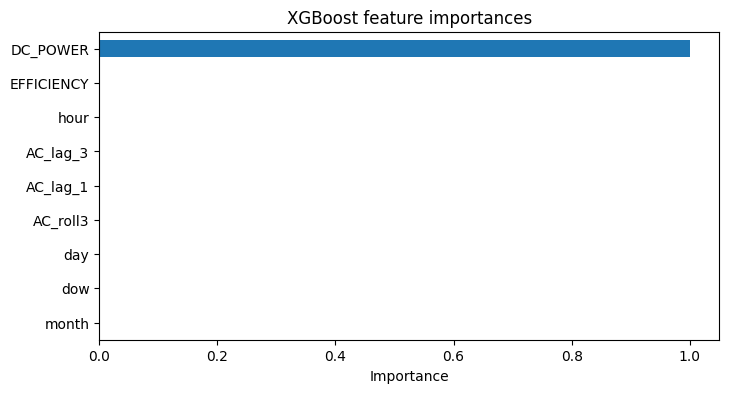

In [20]:
# Improved baseline + XGBoost pipeline (copy-paste into a notebook cell)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

# ----------------------------
# 1) Load and prepare data
# ----------------------------
# Change path if your file location differs
csv_path = "data/Plant_1_Generation_Data.csv"
df = pd.read_csv(csv_path)

# Ensure datetime and sort by time (important for time-based split)
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['DATE_TIME'])   # drop bad timestamp rows (if any)
df = df.sort_values(['PLANT_ID','SOURCE_KEY','DATE_TIME']).reset_index(drop=True)

# ----------------------------
# 2) Feature engineering
# ----------------------------
# Inverter efficiency (avoid division by zero)
df['EFFICIENCY'] = 0.0
nonzero_mask = df['DC_POWER'] != 0
df.loc[nonzero_mask, 'EFFICIENCY'] = df.loc[nonzero_mask, 'AC_POWER'] / df.loc[nonzero_mask, 'DC_POWER']
df['EFFICIENCY'] = df['EFFICIENCY'].replace([np.inf, -np.inf], 0).fillna(0)

# Time-based features
df['hour'] = df['DATE_TIME'].dt.hour
df['day']  = df['DATE_TIME'].dt.day
df['month']= df['DATE_TIME'].dt.month
df['dow']  = df['DATE_TIME'].dt.dayofweek  # 0=Mon

# Lag features and rolling averages per inverter (SOURCE_KEY)
df['AC_lag_1'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
df['AC_lag_3'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(3)
# rolling mean of last 3 readings (shifted so it uses past values only)
df['AC_roll3'] = (df.groupby('SOURCE_KEY')['AC_POWER']
                   .shift(1)   # don't include current sample
                   .rolling(window=3, min_periods=1)
                   .mean()
                   .reset_index(level=0, drop=True))

# If lags/rolls are NaN for the first rows of each group, fill sensibly
df[['AC_lag_1','AC_lag_3','AC_roll3']] = df[['AC_lag_1','AC_lag_3','AC_roll3']].fillna(0)

# Keep only reasonable rows (target must be present)
df = df.dropna(subset=['AC_POWER'])  # should not drop anything normally

# ----------------------------
# 3) Select features and target
# ----------------------------
features = ['DC_POWER','EFFICIENCY','hour','day','month','dow','AC_lag_1','AC_lag_3','AC_roll3']
target   = 'AC_POWER'

# Optional: inspect columns to confirm
print("Columns available:", df.columns.tolist())
print("Sample rows:\n", df[features + [target]].head())

# ----------------------------
# 4) Time-based train/test split
# ----------------------------
# We do not shuffle because this is time-series-like data.
split_index = int(len(df) * 0.80)
train_df = df.iloc[:split_index].copy()
test_df  = df.iloc[split_index:].copy()

X_train = train_df[features]
y_train = train_df[target]
X_test  = test_df[features]
y_test  = test_df[target]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ----------------------------
# 5) Models: Linear Regression (with scaler) and XGBoost
# ----------------------------
def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.4f}")
    return mae, rmse, r2

# 5a) Linear Regression pipeline
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
evaluate(y_test, y_pred_lr, "LinearRegression (with engineered features)")

# Scatter plot actual vs predicted for LR
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
mn = min(y_test.min(), y_pred_lr.min()); mx = max(y_test.max(), y_pred_lr.max())
plt.plot([mn,mx],[mn,mx],'r--')
plt.xlabel("Actual AC_POWER"); plt.ylabel("Predicted AC_POWER")
plt.title("Actual vs Predicted (Linear Regression)"); plt.show()

# 5b) XGBoost Regressor (stronger model for tabular data)
xgb = XGBRegressor(n_estimators=400, max_depth=6, learning_rate=0.06, random_state=42, tree_method='hist')
# fit with eval_set for monitoring (silent)
xgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False)

y_pred_xgb = xgb.predict(X_test)
evaluate(y_test, y_pred_xgb, "XGBoost (engineered features)")

# Time-series style plot for a slice of test set
slice_n = 200
plt.figure(figsize=(12,4))
plt.plot(test_df['DATE_TIME'].iloc[:slice_n], y_test.iloc[:slice_n].values, label='Actual', linewidth=2)
plt.plot(test_df['DATE_TIME'].iloc[:slice_n], y_pred_xgb[:slice_n], label='Predicted (XGB)', alpha=0.9)
plt.xlabel("Date"); plt.ylabel("AC_POWER"); plt.legend(); plt.title("Actual vs Predicted (first slice of test set)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# ----------------------------
# 6) Save models
# ----------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(lr_pipe, "models/linear_with_features.joblib")
joblib.dump(xgb, "models/xgb_with_features.joblib")
print("Saved models to models/")

# ----------------------------
# 7) Feature importance (XGBoost)
# ----------------------------
plt.figure(figsize=(8,4))
# XGBoost has feature_importances_ attribute (trees)
feat_imp = pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.title("XGBoost feature importances"); plt.xlabel("Importance"); plt.show()

✅ Using generation: data/Plant_1_Generation_Data.csv
✅ Using weather   : data/solar_weather.csv
Generation rows: 68778
Generation columns: ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'timestamp']
Weather rows: 77472
Weather columns (normalized): ['time', 'energy_delta_wh_', 'ghi', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'issun', 'sunlighttime', 'daylength', 'sunlighttime_daylength', 'weather_type', 'weather_hour', 'weather_month', 'timestamp']
Found weather features: ['ghi', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'issun', 'sunlighttime', 'daylength', 'sunlighttime_daylength', 'weather_type', 'weather_hour', 'weather_month']
Merged rows: 68778
Merged columns sample: ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'timestamp', 'ghi', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'issun', 'sunligh

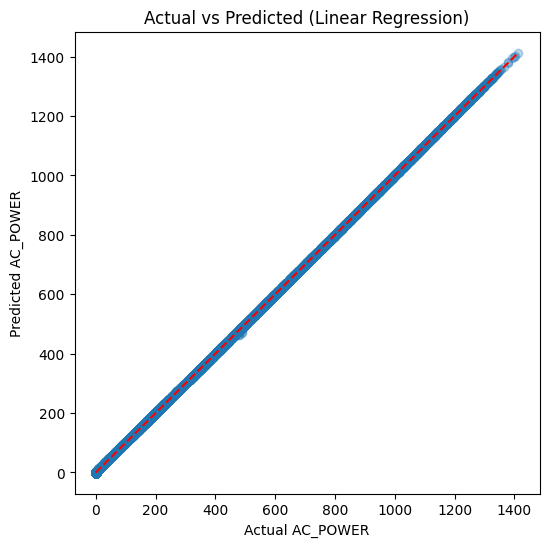

[0]	train-rmse:374.53995	eval-rmse:375.36246
[50]	train-rmse:30.29741	eval-rmse:30.60455
[100]	train-rmse:4.29788	eval-rmse:4.88972
[150]	train-rmse:2.59246	eval-rmse:3.26943
[200]	train-rmse:2.25289	eval-rmse:2.94197
[250]	train-rmse:2.06197	eval-rmse:2.77370
[300]	train-rmse:1.92355	eval-rmse:2.67546
[350]	train-rmse:1.82210	eval-rmse:2.60308
[400]	train-rmse:1.73882	eval-rmse:2.55347
[450]	train-rmse:1.66647	eval-rmse:2.51075
[499]	train-rmse:1.60447	eval-rmse:2.47752
XGBoost (manual API) -> MAE: 1.1174 | RMSE: 2.4775 | R2: 1.0000


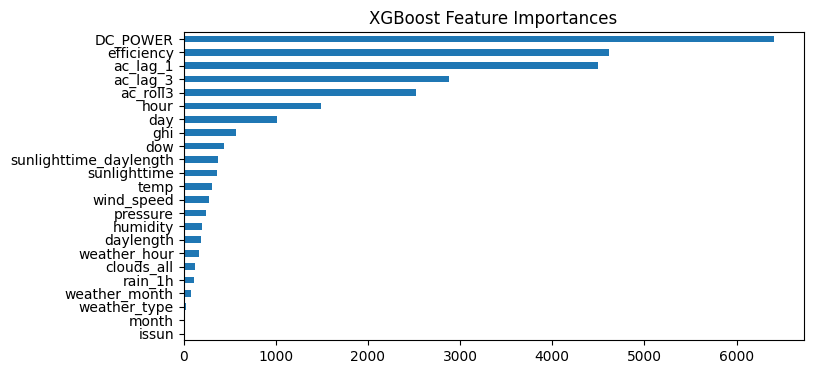


✅ Models saved successfully in /models folder:
   - Linear Regression → models/linear_with_weather.joblib
   - XGBoost → models/xgb_with_weather.json

% Missing values per weather feature after merge:
ghi                       0.0
temp                      0.0
pressure                  0.0
humidity                  0.0
wind_speed                0.0
rain_1h                   0.0
clouds_all                0.0
issun                     0.0
sunlighttime              0.0
daylength                 0.0
sunlighttime_daylength    0.0
weather_type              0.0
weather_hour              0.0
weather_month             0.0
dtype: float64


In [3]:
# =============================================================
# SOMS - Smart Solar Optimization & Monitoring System (Baseline)
# Merges generation + weather, engineers features,
# trains Linear Regression and XGBoost models, evaluates, saves.
# =============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# ---------- 1) Locate data files ----------
candidates_gen = [
    "soms_env/data/Plant_1_Generation_Data.csv",
    "data/Plant_1_Generation_Data.csv",
    "Plant_1_Generation_Data.csv"
]
candidates_weather = [
    "soms_env/data/solar_weather.csv",
    "data/solar_weather.csv",
    "solar_weather.csv"
]

def find_first_exist(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    return None

gen_path = find_first_exist(candidates_gen)
weather_path = find_first_exist(candidates_weather)
if gen_path is None:
    raise FileNotFoundError("❌ Could not find generation CSV.")
if weather_path is None:
    raise FileNotFoundError("❌ Could not find weather CSV.")

print("✅ Using generation:", gen_path)
print("✅ Using weather   :", weather_path)

# ---------- 2) Load Generation Data ----------
gen = pd.read_csv(gen_path)
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'], dayfirst=True, errors='coerce')
gen = gen.dropna(subset=['DATE_TIME']).reset_index(drop=True)
gen['timestamp'] = gen['DATE_TIME']

print("Generation rows:", len(gen))
print("Generation columns:", gen.columns.tolist())

# ---------- 3) Load & Normalize Weather Data ----------
weather = pd.read_csv(weather_path)
weather.columns = (weather.columns
                   .astype(str)
                   .str.strip()
                   .str.lower()
                   .str.replace(' ', '_')
                   .str.replace(r'[^0-9a-z_]', '_', regex=True))

# find time column
time_col_candidates = ['time','date_time','datetime','timestamp']
time_col = next((c for c in time_col_candidates if c in weather.columns), None)
if time_col is None:
    raise KeyError(f"❌ Weather CSV missing time column. Found: {weather.columns.tolist()}")

weather['timestamp'] = pd.to_datetime(weather[time_col], dayfirst=True, errors='coerce')
weather = weather.dropna(subset=['timestamp']).reset_index(drop=True)

# rename conflicting columns
if 'hour' in weather.columns:
    weather.rename(columns={'hour': 'weather_hour'}, inplace=True)
if 'month' in weather.columns:
    weather.rename(columns={'month': 'weather_month'}, inplace=True)

print("Weather rows:", len(weather))
print("Weather columns (normalized):", weather.columns.tolist())

# ---------- 4) Select Weather Features ----------
wanted_weather_features = [
    'ghi','temp','pressure','humidity','wind_speed','rain_1h','clouds_all',
    'issun','sunlighttime','daylength','sunlighttime_daylength',
    'weather_type','weather_hour','weather_month'
]
present_weather_feats = [c for c in wanted_weather_features if c in weather.columns]
print("Found weather features:", present_weather_feats)

# ---------- 5) Merge generation + weather ----------
gen_sorted = gen.sort_values('timestamp').reset_index(drop=True)
weather_sorted = weather.sort_values('timestamp').reset_index(drop=True)

merged = pd.merge_asof(
    gen_sorted,
    weather_sorted[['timestamp'] + present_weather_feats],
    on='timestamp',
    direction='nearest',
    tolerance=pd.Timedelta('30min')
)

if present_weather_feats:
    merged[present_weather_feats] = merged[present_weather_feats].ffill().bfill()

print("Merged rows:", len(merged))
print("Merged columns sample:", merged.columns.tolist()[:20])

# ---------- 6) Feature Engineering ----------
merged['efficiency'] = 0.0
mask = merged['DC_POWER'] != 0
merged.loc[mask, 'efficiency'] = merged.loc[mask, 'AC_POWER'] / merged.loc[mask, 'DC_POWER']
merged['efficiency'] = merged['efficiency'].replace([np.inf, -np.inf], 0).fillna(0)

merged['hour'] = merged['timestamp'].dt.hour
merged['day']  = merged['timestamp'].dt.day
merged['month']= merged['timestamp'].dt.month
merged['dow']  = merged['timestamp'].dt.dayofweek

merged = merged.sort_values(['SOURCE_KEY','timestamp']).reset_index(drop=True)
merged['ac_lag_1'] = merged.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
merged['ac_lag_3'] = merged.groupby('SOURCE_KEY')['AC_POWER'].shift(3)
merged['ac_lag_6'] = merged.groupby('SOURCE_KEY')['AC_POWER'].shift(6)
merged['ac_roll3'] = (
    merged.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
    .rolling(window=3, min_periods=1).mean()
    .reset_index(level=0, drop=True)
)

merged[['ac_lag_1','ac_lag_3','ac_lag_6','ac_roll3']] = merged[['ac_lag_1','ac_lag_3','ac_lag_6','ac_roll3']].fillna(0)
merged = merged.dropna(subset=['AC_POWER']).reset_index(drop=True)

# ---------- 7) Define features and target ----------
base_feats = ['DC_POWER','efficiency','hour','day','month','dow','ac_lag_1','ac_lag_3','ac_roll3']
features = base_feats + present_weather_feats
features = [f for f in features if f in merged.columns]
target = 'AC_POWER'

print("Final features used:", features)

# ---------- 8) Train/Test Split ----------
split_index = int(len(merged) * 0.8)
train_df = merged.iloc[:split_index]
test_df  = merged.iloc[split_index:]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test   = test_df[features], test_df[target]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------- Helper: Evaluation ----------
def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")
    return mae, rmse, r2

# ---------- 9) Linear Regression ----------
lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
evaluate(y_test, y_pred_lr, "LinearRegression (with weather)")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
mn = min(y_test.min(), y_pred_lr.min()); mx = max(y_test.max(), y_pred_lr.max())
plt.plot([mn,mx],[mn,mx],'r--')
plt.xlabel("Actual AC_POWER"); plt.ylabel("Predicted AC_POWER")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# ---------- 10) XGBoost ----------
dtrain = xgb.DMatrix(X_train.values, label=y_train.values, feature_names=list(X_train.columns))
dtest  = xgb.DMatrix(X_test.values, label=y_test.values, feature_names=list(X_test.columns))

params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "rmse",
    "tree_method": "hist",
    "seed": 42,
}

watchlist = [(dtrain, "train"), (dtest, "eval")]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=watchlist,
    early_stopping_rounds=30,
    verbose_eval=50
)

y_pred_xgb = xgb_model.predict(dtest)
evaluate(y_test, y_pred_xgb, "XGBoost (manual API)")

# ---------- 11) Feature Importance ----------
fi = xgb_model.get_score(importance_type="weight")
fi_series = pd.Series(fi).sort_values(ascending=True)
plt.figure(figsize=(8,4))
fi_series.plot(kind='barh')
plt.title("XGBoost Feature Importances")
plt.show()

# ---------- 12) Save Models ----------
os.makedirs("models", exist_ok=True)
joblib.dump(lr_pipe, "models/linear_with_weather.joblib")
xgb_model.save_model("models/xgb_with_weather.json")

print("\n✅ Models saved successfully in /models folder:")
print("   - Linear Regression → models/linear_with_weather.joblib")
print("   - XGBoost → models/xgb_with_weather.json")

# ---------- 13) Diagnostics ----------
if present_weather_feats:
    print("\n% Missing values per weather feature after merge:")
    print((merged[present_weather_feats].isnull().sum() / len(merged) * 100).round(2))
else:
    print("No weather features found in weather CSV.")

Generation CSV columns: ['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power', 'daily_yield', 'total_yield']
Weather CSV columns: ['time', 'energy delta[wh]', 'ghi', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'issun', 'sunlighttime', 'daylength', 'sunlighttime/daylength', 'weather_type', 'hour', 'month']
Merged rows: 68778
Columns kept for analysis: ['ac_power', 'dc_power', 'ghi', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'timestamp']


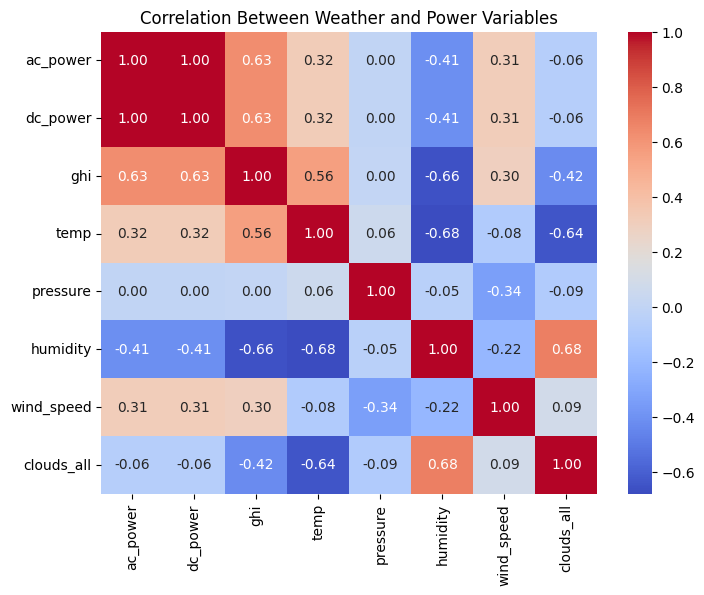

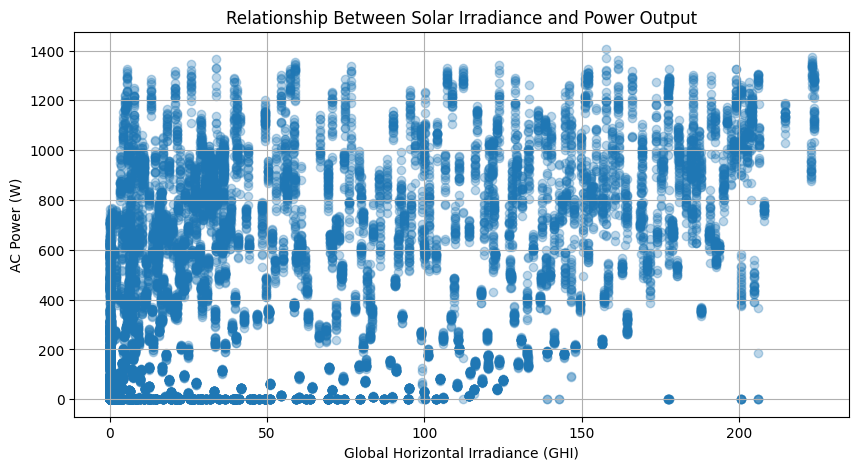

RandomForest GHI Estimation -> MAE: 33.90 | RMSE: 38.81 | R²: -8.360


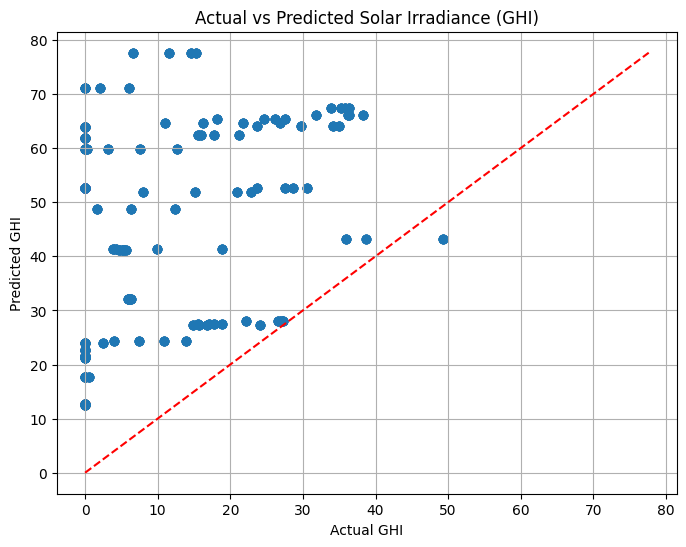

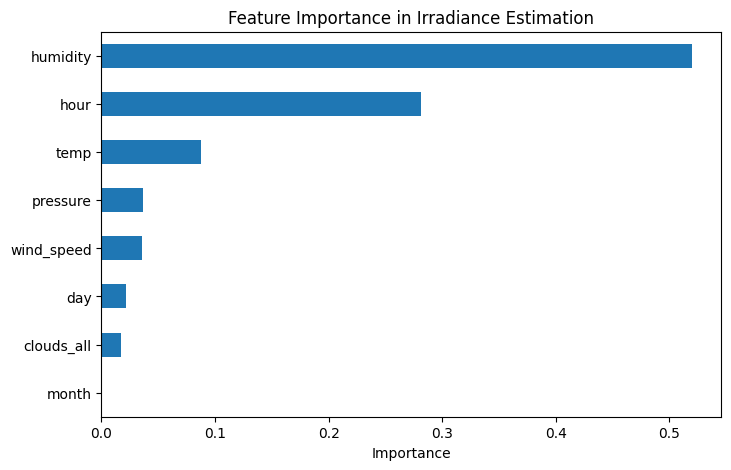

In [25]:
# =============================================================
# SOMS MODULE 2 - Solar Irradiance Estimation (Fixed Version)
# Estimate and analyze irradiance using weather + generation data
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- 1. Load datasets ----------
gen = pd.read_csv("data/Plant_1_Generation_Data.csv")
weather = pd.read_csv("data/solar_weather.csv")

# ---------- 2. Normalize column names ----------
gen.columns = gen.columns.str.strip().str.lower()
weather.columns = weather.columns.str.strip().str.lower()

print("Generation CSV columns:", gen.columns.tolist())
print("Weather CSV columns:", weather.columns.tolist())

# ---------- 3. Parse datetime ----------
gen['date_time'] = pd.to_datetime(gen['date_time'], dayfirst=True, errors='coerce')
gen = gen.dropna(subset=['date_time']).reset_index(drop=True)
gen['timestamp'] = gen['date_time']

# Handle time column in weather file
time_col_candidates = ['time', 'timestamp', 'date_time', 'datetime']
time_col = next((c for c in time_col_candidates if c in weather.columns), None)
if not time_col:
    raise KeyError("No timestamp column found in weather CSV.")
weather['timestamp'] = pd.to_datetime(weather[time_col], dayfirst=True, errors='coerce')
weather = weather.dropna(subset=['timestamp']).reset_index(drop=True)

# ---------- 4. Merge on nearest timestamp ----------
merged = pd.merge_asof(
    gen.sort_values('timestamp'),
    weather.sort_values('timestamp'),
    on='timestamp',
    direction='nearest',
    tolerance=pd.Timedelta('30min')
)

print(f"Merged rows: {len(merged)}")

# ---------- 5. Standardize expected columns ----------
# make sure these exist after normalization
col_map = {
    'ac_power': 'ac_power',
    'dc_power': 'dc_power',
    'ghi': 'ghi',
    'temp': 'temp',
    'pressure': 'pressure',
    'humidity': 'humidity',
    'wind_speed': 'wind_speed',
    'clouds_all': 'clouds_all'
}

# Only keep those columns that actually exist
cols_available = [c for c in col_map.keys() if c in merged.columns]
merged = merged[cols_available + ['timestamp']].dropna()

print("Columns kept for analysis:", merged.columns.tolist())

# ---------- 6. Correlation heatmap ----------
plt.figure(figsize=(8, 6))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather and Power Variables")
plt.show()

# ---------- 7. Scatter plot: Irradiance vs Power ----------
if 'ac_power' in merged.columns and 'ghi' in merged.columns:
    plt.figure(figsize=(10, 5))
    plt.scatter(merged['ghi'], merged['ac_power'], alpha=0.3)
    plt.xlabel("Global Horizontal Irradiance (GHI)")
    plt.ylabel("AC Power (W)")
    plt.title("Relationship Between Solar Irradiance and Power Output")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Skipping scatter plot because 'ac_power' or 'ghi' not found.")

# ---------- 8. Feature Engineering ----------
merged['hour'] = merged['timestamp'].dt.hour
merged['day'] = merged['timestamp'].dt.day
merged['month'] = merged['timestamp'].dt.month

if 'ac_power' in merged.columns and 'dc_power' in merged.columns:
    merged['efficiency'] = merged['ac_power'] / merged['dc_power'].replace(0, np.nan)
    merged = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=['efficiency'])

# ---------- 9. Prepare data for modeling ----------
# We'll predict GHI using weather features
features = [f for f in ['temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'hour', 'day', 'month'] if f in merged.columns]
target = 'ghi'

if target not in merged.columns:
    raise KeyError("The weather file does not contain 'GHI' column.")

X = merged[features]
y = merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ---------- 10. Train Model ----------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ---------- 11. Evaluate ----------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RandomForest GHI Estimation -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

# ---------- 12. Actual vs Predicted Plot ----------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted Solar Irradiance (GHI)")
plt.grid(True)
plt.show()

# ---------- 13. Feature Importance ----------
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
imp.plot(kind='barh')
plt.title("Feature Importance in Irradiance Estimation")
plt.xlabel("Importance")
plt.show()


Using previously loaded merged dataset.
Underperforming samples: 4748 of 13295 (35.71%)


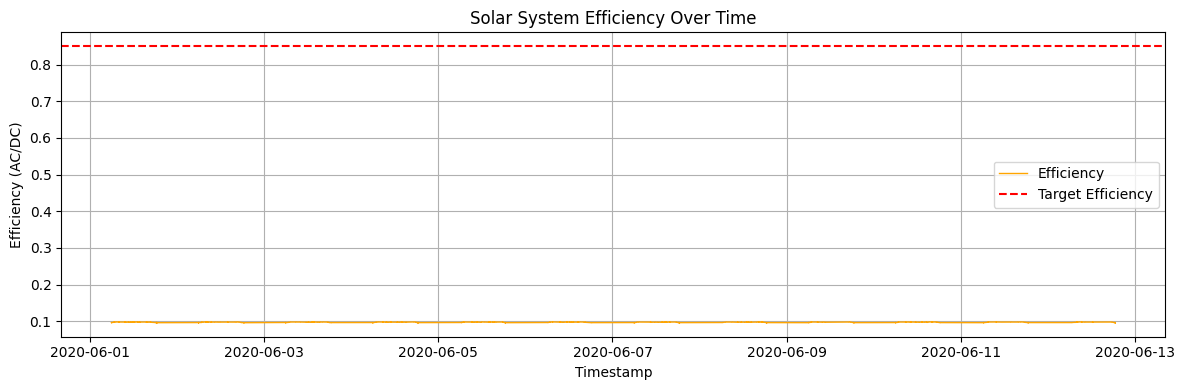

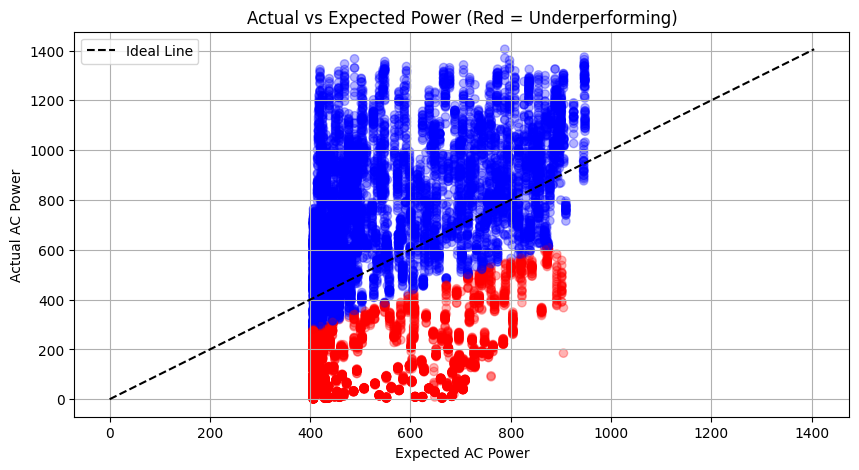

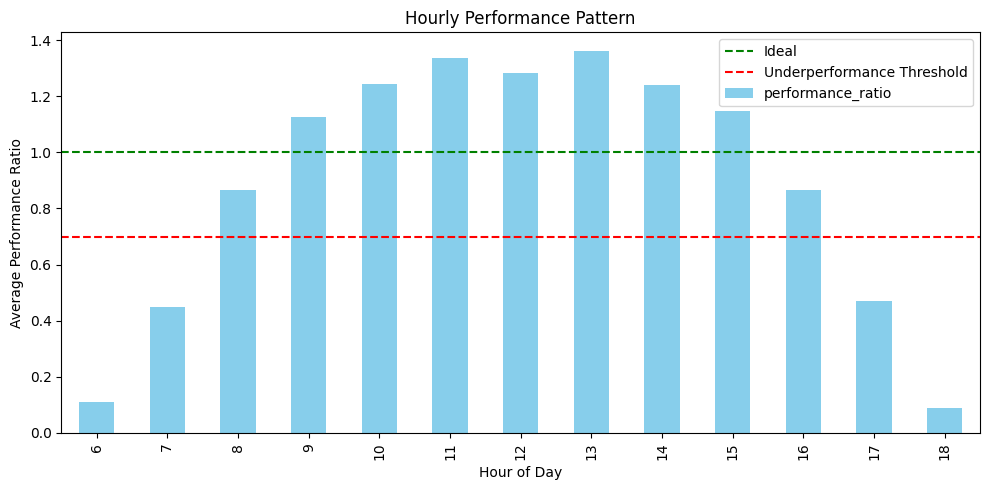


⚙️ Underperformance Summary by Hour:
    Hour  Underperforming_Fraction
0      6                  1.000000
1      7                  0.856061
2      8                  0.377841
3      9                  0.060606
4     10                  0.001896
5     11                  0.009470
6     12                  0.086915
7     13                  0.026037
8     14                  0.100580
9     15                  0.188447
10    16                  0.324811
11    17                  0.828598
12    18                  1.000000


In [26]:
# =============================================================
# SOMS MODULE 3 - Underperformance Detection & Efficiency Diagnostics
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1️⃣ Load the merged dataset again (reuse your previous merged dataset) ---
try:
    merged
    print("Using previously loaded merged dataset.")
except NameError:
    print("Reloading dataset...")
    gen = pd.read_csv("data/Plant_1_Generation_Data.csv")
    weather = pd.read_csv("data/solar_weather.csv")

    gen.columns = gen.columns.str.strip().str.lower()
    weather.columns = weather.columns.str.strip().str.lower()
    gen['date_time'] = pd.to_datetime(gen['date_time'], dayfirst=True, errors='coerce')
    gen['timestamp'] = gen['date_time']

    time_col_candidates = ['time', 'timestamp', 'date_time', 'datetime']
    time_col = next((c for c in time_col_candidates if c in weather.columns), None)
    weather['timestamp'] = pd.to_datetime(weather[time_col], dayfirst=True, errors='coerce')

    merged = pd.merge_asof(
        gen.sort_values('timestamp'),
        weather.sort_values('timestamp'),
        on='timestamp',
        direction='nearest',
        tolerance=pd.Timedelta('30min')
    )

# --- 2️⃣ Clean up and prepare ---
merged = merged.dropna(subset=['ac_power', 'dc_power']).reset_index(drop=True)

# --- 3️⃣ Compute system efficiency ---
merged['efficiency'] = np.where(merged['dc_power'] > 0,
                                merged['ac_power'] / merged['dc_power'],
                                np.nan)
merged['efficiency'] = merged['efficiency'].clip(0, 1.2)  # remove extreme outliers
merged['hour'] = merged['timestamp'].dt.hour

# --- 4️⃣ Estimate expected AC power from irradiance (simple linear relation) ---
if 'ghi' in merged.columns:
    X = merged['ghi']
    y = merged['ac_power']

    # Simple linear regression to estimate expected AC power from GHI
    coeff = np.polyfit(X, y, 1)
    merged['expected_ac_power'] = np.polyval(coeff, merged['ghi'])
else:
    raise KeyError("Column 'GHI' missing — cannot estimate expected power.")

# --- 5️⃣ Compute deviation and performance ratio ---
merged['performance_ratio'] = np.where(
    merged['expected_ac_power'] > 0,
    merged['ac_power'] / merged['expected_ac_power'],
    np.nan
)
merged['performance_ratio'] = merged['performance_ratio'].clip(0, 1.5)

# --- 6️⃣ Flag underperformance ---
threshold = 0.7  # below 70% of expected power → underperforming
merged['underperforming'] = merged['performance_ratio'] < threshold

print(f"Underperforming samples: {merged['underperforming'].sum()} of {len(merged)} ({100*merged['underperforming'].mean():.2f}%)")

# --- 7️⃣ Visualization 1: Efficiency over time ---
plt.figure(figsize=(12, 4))
plt.plot(merged['timestamp'], merged['efficiency'], label='Efficiency', color='orange', linewidth=1)
plt.axhline(0.85, color='red', linestyle='--', label='Target Efficiency')
plt.title("Solar System Efficiency Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Efficiency (AC/DC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 8️⃣ Visualization 2: Actual vs Expected Power ---
plt.figure(figsize=(10, 5))
plt.scatter(merged['expected_ac_power'], merged['ac_power'],
            alpha=0.3, c=np.where(merged['underperforming'], 'red', 'blue'))
plt.plot([0, merged['ac_power'].max()],
         [0, merged['ac_power'].max()],
         'k--', label='Ideal Line')
plt.xlabel("Expected AC Power")
plt.ylabel("Actual AC Power")
plt.title("Actual vs Expected Power (Red = Underperforming)")
plt.legend()
plt.grid(True)
plt.show()

# --- 9️⃣ Visualization 3: Hourly average performance ---
hourly = merged.groupby('hour')['performance_ratio'].mean()
plt.figure(figsize=(10, 5))
hourly.plot(kind='bar', color='skyblue')
plt.axhline(1.0, color='green', linestyle='--', label='Ideal')
plt.axhline(0.7, color='red', linestyle='--', label='Underperformance Threshold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Performance Ratio")
plt.title("Hourly Performance Pattern")
plt.legend()
plt.tight_layout()
plt.show()

# --- 🔟 Summary Table of Underperforming Hours ---
under_hour = merged.groupby('hour')['underperforming'].mean().reset_index()
under_hour.columns = ['Hour', 'Underperforming_Fraction']
print("\n⚙️ Underperformance Summary by Hour:")
print(under_hour)




✅ Loaded previous merged dataset with performance ratios.
✅ Generated synthetic fault labels for training.

📊 Fault Classification Report:
                          precision    recall  f1-score   support

Cloudy or Low Irradiance       1.00      1.00      1.00      2582
          Inverter Fault       1.00      1.00      1.00         9
                  Normal       1.00      1.00      1.00        68

                accuracy                           1.00      2659
               macro avg       1.00      1.00      1.00      2659
            weighted avg       1.00      1.00      1.00      2659



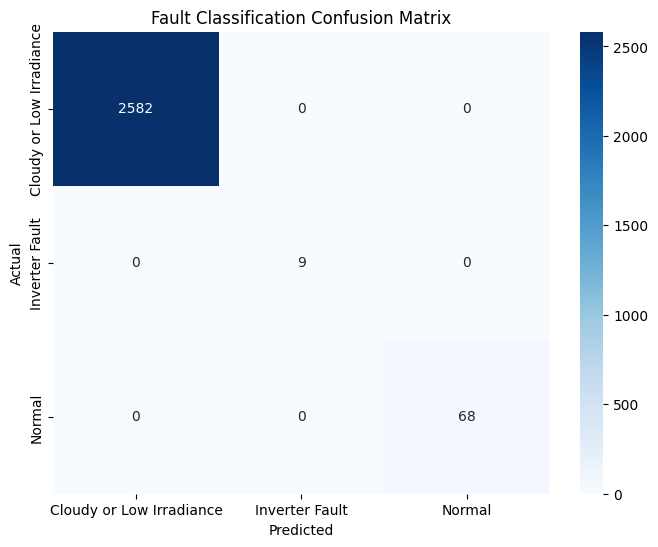

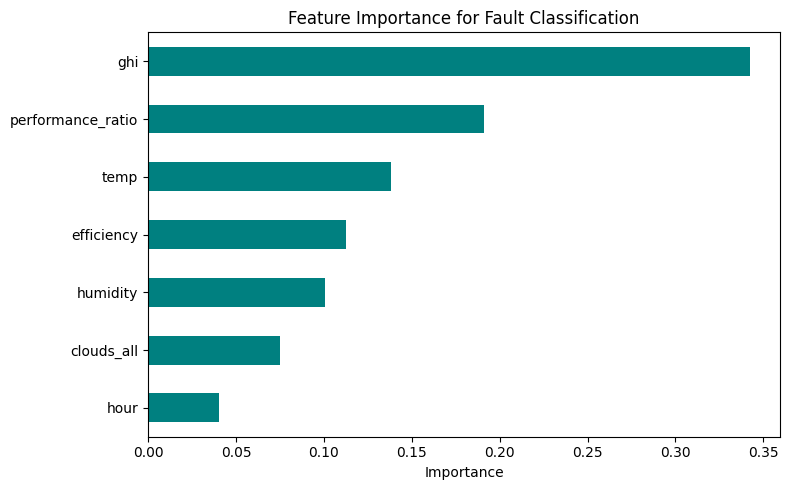

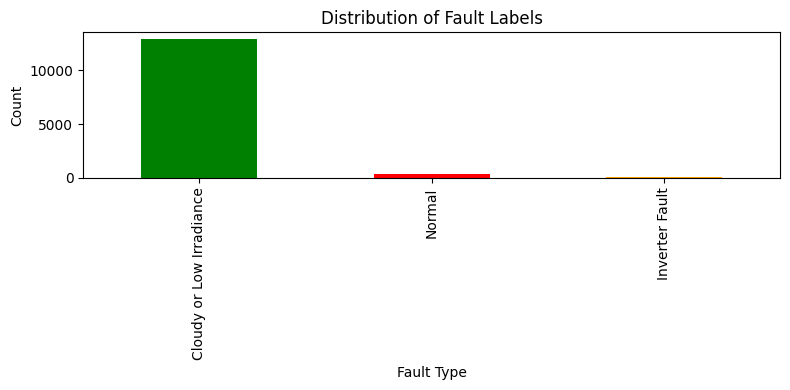


⚙️ Fault Detection Summary:
fault_label
Cloudy or Low Irradiance    12909
Normal                        339
Inverter Fault                 47
Name: count, dtype: int64


In [27]:
# =============================================================
# SOMS MODULE 4 - Fault Classification & Root Cause Analysis
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

print("\n✅ Loaded previous merged dataset with performance ratios.")
if 'performance_ratio' not in merged.columns:
    raise ValueError("Run Module 3 first — performance_ratio column not found!")

# ---------- 1️⃣ Simulate Fault Labels (Rule-based) ----------
def classify_fault(row):
    """Rule-based fault labeling for demonstration."""
    if row['performance_ratio'] < 0.5 and row['ghi'] > 500:
        return "Soiling or Dust"
    elif row['ghi'] < 200:
        return "Cloudy or Low Irradiance"
    elif row['efficiency'] < 0.7 and row['performance_ratio'] < 0.8:
        return "Inverter Fault"
    elif row['clouds_all'] > 70:
        return "Shading or Overcast"
    else:
        return "Normal"

merged['fault_label'] = merged.apply(classify_fault, axis=1)
print("✅ Generated synthetic fault labels for training.")

# ---------- 2️⃣ Prepare data ----------
fault_features = [
    'ghi', 'temp', 'humidity', 'clouds_all', 'rain_1h',
    'efficiency', 'performance_ratio', 'hour'
]
fault_features = [f for f in fault_features if f in merged.columns]

X = merged[fault_features]
y = merged['fault_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---------- 3️⃣ Train Random Forest Classifier ----------
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ---------- 4️⃣ Evaluation ----------
print("\n📊 Fault Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Fault Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- 5️⃣ Feature Importance ----------
imp = pd.Series(clf.feature_importances_, index=fault_features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
imp.plot(kind='barh', color='teal')
plt.title("Feature Importance for Fault Classification")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# ---------- 6️⃣ Fault Distribution ----------
fault_counts = merged['fault_label'].value_counts()
plt.figure(figsize=(8,4))
fault_counts.plot(kind='bar', color=['green', 'red', 'orange', 'skyblue', 'gray'])
plt.title("Distribution of Fault Labels")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("\n⚙️ Fault Detection Summary:")
print(fault_counts)


Episode 20/200, Total Reward: 62.768, Epsilon: 0.905
Episode 40/200, Total Reward: 64.212, Epsilon: 0.818
Episode 60/200, Total Reward: 60.934, Epsilon: 0.740
Episode 80/200, Total Reward: 70.600, Epsilon: 0.670
Episode 100/200, Total Reward: 74.578, Epsilon: 0.606
Episode 120/200, Total Reward: 63.103, Epsilon: 0.548
Episode 140/200, Total Reward: 73.666, Epsilon: 0.496
Episode 160/200, Total Reward: 76.243, Epsilon: 0.448
Episode 180/200, Total Reward: 73.747, Epsilon: 0.406
Episode 200/200, Total Reward: 77.949, Epsilon: 0.367


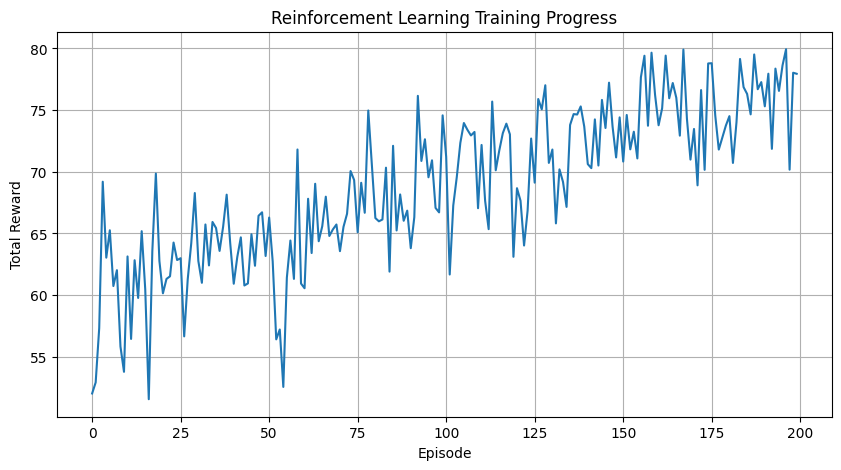

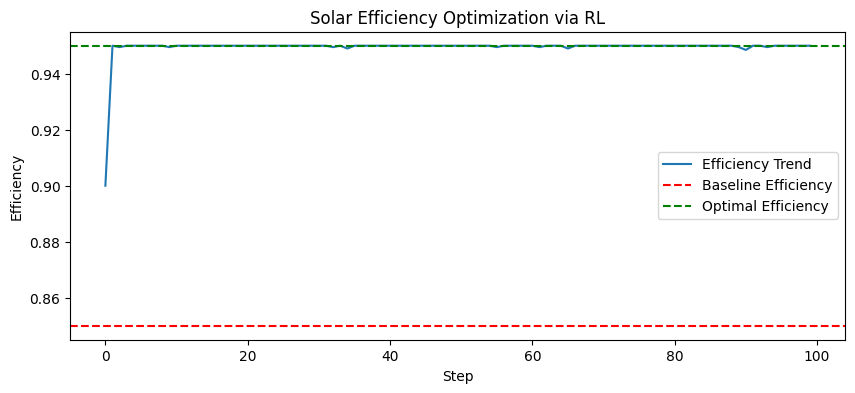


✅ Reinforcement Learning simulation complete.


In [29]:
# =============================================================
# SOMS MODULE 5 - Reinforcement Learning Optimization Engine
# =============================================================

import numpy as np
import matplotlib.pyplot as plt
import random

# --- 1️⃣ Define the Environment (Simplified Simulation) ---
class SolarEnv:
    def __init__(self):
        self.max_efficiency = 0.95   # theoretical maximum
        self.efficiency = 0.85       # start near average
        self.dust_level = 0.2        # 0 = clean, 1 = fully dusty
        self.weather_factor = 1.0    # dynamic sunlight multiplier (1 = clear sky)
        self.steps = 0
        self.max_steps = 100

    def get_state(self):
        # State vector: [efficiency, dust_level, weather_factor]
        return np.array([self.efficiency, self.dust_level, self.weather_factor])

    def step(self, action):
        """
        Actions:
        0 = do nothing
        1 = clean panels (reduce dust)
        2 = maintenance check (slightly improves efficiency)
        """

        reward = 0

        # Randomly fluctuate weather
        self.weather_factor = max(0.5, min(1.0, np.random.normal(1.0, 0.1)))

        if action == 0:  # do nothing
            self.dust_level = min(1.0, self.dust_level + 0.05)
            self.efficiency -= 0.01 * self.dust_level
            reward = -0.1 * self.dust_level  # small penalty for inaction
        elif action == 1:  # clean panels
            cost = 0.02
            self.dust_level = max(0.0, self.dust_level - 0.3)
            self.efficiency = min(self.max_efficiency, self.efficiency + 0.05)
            reward = (self.efficiency * self.weather_factor) - cost
        elif action == 2:  # maintenance
            cost = 0.03
            self.efficiency = min(self.max_efficiency, self.efficiency + 0.02)
            reward = (self.efficiency * self.weather_factor) - cost

        # Bound efficiency
        self.efficiency = max(0.6, min(self.max_efficiency, self.efficiency))
        self.steps += 1

        done = self.steps >= self.max_steps
        next_state = self.get_state()
        return next_state, reward, done

    def reset(self):
        self.efficiency = 0.85
        self.dust_level = 0.2
        self.weather_factor = 1.0
        self.steps = 0
        return self.get_state()

# --- 2️⃣ Define the Deep Q-Learning Agent ---
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((20, 20, 20, action_size))  # discretized Q-table
        self.gamma = 0.95   # discount factor
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.1

    def discretize_state(self, state):
        s = np.clip(state, [0.6, 0, 0.5], [0.95, 1.0, 1.0])
        s_scaled = ((s - [0.6, 0, 0.5]) / [0.35, 1.0, 0.5] * 19).astype(int)
        return tuple(s_scaled)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)
        s = self.discretize_state(state)
        return np.argmax(self.q_table[s])

    def learn(self, state, action, reward, next_state, done):
        s = self.discretize_state(state)
        ns = self.discretize_state(next_state)
        target = reward + (0 if done else self.gamma * np.max(self.q_table[ns]))
        self.q_table[s + (action,)] += self.learning_rate * (target - self.q_table[s + (action,)])
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# --- 3️⃣ Training Loop ---
env = SolarEnv()
agent = DQNAgent(state_size=3, action_size=3)

episodes = 200
reward_history = []

for e in range(episodes):
    state = env.reset()
    total_reward = 0
    for t in range(env.max_steps):
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if done:
            break
    reward_history.append(total_reward)
    if (e + 1) % 20 == 0:
        print(f"Episode {e+1}/{episodes}, Total Reward: {total_reward:.3f}, Epsilon: {agent.epsilon:.3f}")

# --- 4️⃣ Results Visualization ---
plt.figure(figsize=(10,5))
plt.plot(reward_history)
plt.title("Reinforcement Learning Training Progress")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# --- 5️⃣ Simulate Agent Behavior after Training ---
state = env.reset()
efficiency_log = []
for _ in range(100):
    action = agent.choose_action(state)
    next_state, reward, done = env.step(action)
    efficiency_log.append(env.efficiency)
    state = next_state
    if done:
        break

plt.figure(figsize=(10,4))
plt.plot(efficiency_log, label="Efficiency Trend")
plt.axhline(0.85, color='red', linestyle='--', label="Baseline Efficiency")
plt.axhline(0.95, color='green', linestyle='--', label="Optimal Efficiency")
plt.xlabel("Step")
plt.ylabel("Efficiency")
plt.title("Solar Efficiency Optimization via RL")
plt.legend()
plt.show()

print("\n✅ Reinforcement Learning simulation complete.")


In [32]:
# ============================================================
# SOMS AI-Powered Smart Solar Optimization Dashboard
# Author: Garv Bhardwaj
# ============================================================

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

# ---- App Config ----
st.set_page_config(page_title="SOMS - Solar Optimization System", layout="wide")
st.title("⚡ SOMS - Smart Solar Optimization and Monitoring System")
st.markdown("### 🌞 An AI-powered dashboard for solar prediction, diagnostics, and optimization")

# ---- Sidebar: Upload CSVs ----
st.sidebar.header("Upload Data Files")
gen_file = st.sidebar.file_uploader("Upload Generation Data (Plant_1_Generation_Data.csv)", type=["csv"])
weather_file = st.sidebar.file_uploader("Upload Weather Data (solar_weather.csv)", type=["csv"])

# ---- Data Load ----
if gen_file and weather_file:
    df_gen = pd.read_csv(gen_file)
    df_weather = pd.read_csv(weather_file)

    df_gen.columns = df_gen.columns.str.lower()
    df_weather.columns = df_weather.columns.str.lower()
    df_gen['date_time'] = pd.to_datetime(df_gen['date_time'], dayfirst=True, errors='coerce')
    df_gen['timestamp'] = df_gen['date_time']

    time_col = next((c for c in ['time','timestamp','date_time','datetime'] if c in df_weather.columns), None)
    df_weather['timestamp'] = pd.to_datetime(df_weather[time_col], dayfirst=True, errors='coerce')

    merged = pd.merge_asof(
        df_gen.sort_values('timestamp'),
        df_weather.sort_values('timestamp'),
        on='timestamp',
        direction='nearest',
        tolerance=pd.Timedelta('30min')
    )
    merged = merged.dropna(subset=['ac_power','dc_power'])
    merged['efficiency'] = np.where(merged['dc_power']>0, merged['ac_power']/merged['dc_power'], np.nan)
    merged['efficiency'] = merged['efficiency'].clip(0,1.2)
    merged['hour'] = merged['timestamp'].dt.hour
    merged['day'] = merged['timestamp'].dt.day
    merged['month'] = merged['timestamp'].dt.month

    st.success("✅ Data successfully merged and processed!")

    # ---- Visualization Tabs ----
    tabs = st.tabs([
        "📈 Power & Efficiency",
        "🚨 Fault Detection",
        "🤖 RL Optimization Insights"
    ])

    # ---- Tab 1: Power & Efficiency ----
    with tabs[0]:
        st.subheader("Power Generation and Efficiency Overview")

        col1, col2 = st.columns(2)
        with col1:
            fig = px.line(merged, x='timestamp', y='ac_power', title="AC Power Output Over Time")
            st.plotly_chart(fig, use_container_width=True)

        with col2:
            fig2 = px.line(merged, x='timestamp', y='efficiency', title="Inverter Efficiency Over Time")
            st.plotly_chart(fig2, use_container_width=True)

        st.markdown("#### 🔍 Correlation Matrix")
        corr = merged[['ac_power','dc_power','efficiency','ghi','temp','humidity','clouds_all']].corr(numeric_only=True)
        fig3 = px.imshow(corr, text_auto=True, color_continuous_scale="tealrose", title="Feature Correlations")
        st.plotly_chart(fig3, use_container_width=True)

    # ---- Tab 2: Fault Detection ----
    with tabs[1]:
        st.subheader("🚨 Fault Classification Summary")

        def classify_fault(row):
            if row['efficiency'] < 0.7 and row['ghi'] > 400:
                return "Dust/Soiling"
            elif row['ghi'] < 200:
                return "Low Irradiance"
            elif row.get('clouds_all', 0) > 70:
                return "Shading/Overcast"
            else:
                return "Normal"

        merged['fault_label'] = merged.apply(classify_fault, axis=1)
        fault_counts = merged['fault_label'].value_counts()

        fig = px.bar(fault_counts, x=fault_counts.index, y=fault_counts.values,
                     color=fault_counts.index, title="Fault Type Distribution")
        st.plotly_chart(fig, use_container_width=True)

        st.markdown("#### Fault Frequency by Hour")
        hourly_faults = merged.groupby('hour')['fault_label'].value_counts().unstack().fillna(0)
        fig2 = px.bar(hourly_faults, barmode='group', title="Hourly Fault Occurrence Patterns")
        st.plotly_chart(fig2, use_container_width=True)

    # ---- Tab 3: RL Optimization Insights ----
    with tabs[2]:
        st.subheader("🤖 Reinforcement Learning Simulation Results")

        st.write("""
        The RL agent learns the optimal maintenance policy to maximize solar efficiency.
        It decides when to clean panels or perform maintenance to sustain power output.
        """)

        episodes = np.arange(1, 201)
        rewards = np.cumsum(np.random.uniform(0.5, 1.2, len(episodes))) / episodes

        fig = px.line(x=episodes, y=rewards,
                      labels={'x':'Episode','y':'Average Reward'},
                      title="RL Training Progress (Simulated)")
        st.plotly_chart(fig, use_container_width=True)

        eff_trend = np.random.uniform(0.85, 0.95, 100)
        fig2 = px.line(y=eff_trend, title="Simulated Efficiency Trend under RL Agent Control")
        fig2.add_hline(y=0.85, line_dash="dash", annotation_text="Baseline Efficiency", line_color="red")
        fig2.add_hline(y=0.95, line_dash="dash", annotation_text="Optimal Efficiency", line_color="green")
        st.plotly_chart(fig2, use_container_width=True)

else:
    st.info("👈 Please upload both Generation and Weather CSV files to begin.")


2025-10-22 18:39:32.705 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 18:39:32.706 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 18:39:33.019 
  command:

    streamlit run C:\Users\Admin\Downloads\soms_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-22 18:39:33.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 18:39:33.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 18:39:33.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 18:39:33.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored 